# MILESTONES 1

`Rizqi Rizmayani Putri Batch 002`

### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


!pip install feature_engine
!pip install sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 9.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=a854d41c7a9da1ab13f0215ed6764cfb419ad807d43450d10d4b869bc506a229
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


### DATA LOADING AND OVERVIEW

#### Query SQL

```text
SELECT 
limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 3988
```

In [2]:
df = pd.read_csv('h8dsft_P1M1_rizqi_rizmayani.csv', na_values=['?',' ','99999','N/A'],skipinitialspace = True)

In [3]:
df.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1


In [4]:
df.tail(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2963,210000.0,2,1,1,38.0,0.0,0.0,-1.0,-1.0,0,...,23067.0,19972.0,45864.0,3000.0,4521.0,24000.0,10000.0,30000.0,6432.0,0
2964,360000.0,2,2,1,37.0,-1.0,-1.0,0.0,-1.0,-1,...,10000.0,10000.0,10000.0,17444.0,10035.0,10000.0,10000.0,10000.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [6]:
df[df.duplicated()].shape

(1, 24)

In [7]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [8]:
df.shape

(2965, 24)

In [9]:
m_v = {}
for i in list(df.columns):
    m_v[i] = 0
    for j in df[i]:
        if j in ['N/A', '--', '-', 'Null', '?', 'NaN']:
            m_v[i] = m_v[i] + 1
m_v

{'limit_balance': 0,
 'sex': 0,
 'education_level': 0,
 'marital_status': 0,
 'age': 0,
 'pay_0': 0,
 'pay_2': 0,
 'pay_3': 0,
 'pay_4': 0,
 'pay_5': 0,
 'pay_6': 0,
 'bill_amt_1': 0,
 'bill_amt_2': 0,
 'bill_amt_3': 0,
 'bill_amt_4': 0,
 'bill_amt_5': 0,
 'bill_amt_6': 0,
 'pay_amt_1': 0,
 'pay_amt_2': 0,
 'pay_amt_3': 0,
 'pay_amt_4': 0,
 'pay_amt_5': 0,
 'pay_amt_6': 0,
 'default_payment_next_month': 0}

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Informasi yang didapatkan dari loading data dan overview:
- dataframe terdapat data numerik dan data kategorikal
- target data merupakan kolom 'default_payment_next_month', kolom tersebut berisi informasi ketepatan bayar seorang nasabah pada bulan selanjutnya
- terdapatnya data duplicated yang selanjutnya akan dihapus pada proses cleaning data
- tidak terdapatnya missing value

Berikut adalah keterangan dari tiap-tiap kolom:

- `limit_balance`   : Amount of given credit in NT dollars (includes individual and family/supplementary credit)        
- `sex` : Gender (1=male, 2=female)
- `education_level` : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
- `marital_status`  : Marital status (1=married, 2=single, 3=others)           
- `age` : Age in years            
- `pay_0`   : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)           
- `pay_2`   : Repayment status in August, 2005 (scale same as above) 
- `pay_3`   : Repayment status in July, 2005 (scale same as above)               
- `pay_4`   : Repayment status in June, 2005 (scale same as above)              
- `pay_5`   : Repayment status in May, 2005 (scale same as above)              
- `pay_6`   : Repayment status in April, 2005 (scale same as above)               
- `bill_amt_1`  : Amount of bill statement in September, 2005 (NT dollar)             
- `bill_amt_2`  : Amount of bill statement in August, 2005 (NT dollar)             
- `bill_amt_3`  : Amount of bill statement in July, 2005 (NT dollar)             
- `bill_amt_4`  : Amount of bill statement in June, 2005 (NT dollar)             
- `bill_amt_5`  : Amount of bill statement in May, 2005 (NT dollar)             
- `bill_amt_6`  : Amount of bill statement in April, 2005 (NT dollar)             
- `pay_amt_1`   : Amount of previous payment in September, 2005 (NT dollar)              
- `pay_amt_2`   : Amount of previous payment in August, 2005 (NT dollar)              
- `pay_amt_3`   : Amount of previous payment in July, 2005 (NT dollar)              
- `pay_amt_4`   : Amount of previous payment in June, 2005 (NT dollar)              
- `pay_amt_5`   : Amount of previous payment in May, 2005 (NT dollar)              
- `pay_amt_6`   : Amount of previous payment in April, 2005 (NT dollar)              
- `default_payment_next_month`  : Default payment (1=yes, 0=no)

Data pada kolom kategorikal:
- terdapat beberapa angka yang tidak termasuk kedalam keterangan yang mana selanjutnya akan dilakukan feature engenering pada proses cleaning

### DATA CLEANING

In [11]:
df_clean = df.copy()
df_clean.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1


In [12]:
df_clean[df_clean.duplicated()].shape

(1, 24)

In [13]:
df_clean.drop_duplicates(inplace=True)

df_clean[df_clean.duplicated()].shape

(0, 24)

- `sex` : Gender (1=male, 2=female)

In [14]:
df_clean['sex'].value_counts()

2    1801
1    1163
Name: sex, dtype: int64

- `education_level` : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  

In [15]:
df_clean['education_level'].value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

In [16]:
df_clean.education_level.replace({0: 4, 5: 4, 6:4}, inplace=True)
df_clean.education_level.value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

- `marital_status`  : Marital status (1=married, 2=single, 3=others)   

In [17]:
df_clean['marital_status'].value_counts()

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

In [18]:
df_clean.marital_status.replace({0: 3}, inplace=True)
df_clean.marital_status.value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

- `pay_0`   : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)           
- `pay_2`   : Repayment status in August, 2005 (scale same as above) 
- `pay_3`   : Repayment status in July, 2005 (scale same as above)               
- `pay_4`   : Repayment status in June, 2005 (scale same as above)              
- `pay_5`   : Repayment status in May, 2005 (scale same as above)              
- `pay_6`   : Repayment status in April, 2005 (scale same as above)

In [19]:
df_clean['pay_0'].value_counts()

 0.0    1516
-1.0     540
 1.0     355
 2.0     262
-2.0     247
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: pay_0, dtype: int64

In [20]:
df_clean.pay_0.replace({-1: 0, -2: 0, 4:3, 5:3, 6:3, 7:3, 8:3}, inplace=True)
df_clean.pay_0.value_counts()

0.0    2303
1.0     355
2.0     262
3.0      44
Name: pay_0, dtype: int64

In [21]:
df_clean.pay_2.value_counts()

 0.0    1607
-1.0     580
 2.0     374
-2.0     352
 3.0      32
 4.0       8
 1.0       4
 7.0       3
 5.0       2
 6.0       2
Name: pay_2, dtype: int64

In [22]:
df_clean.pay_2.replace({-1: 0, -2: 0, 4:3, 5:3, 6:3, 7:3, 8:3}, inplace=True)
df_clean.pay_2.value_counts()

0.0    2539
2.0     374
3.0      47
1.0       4
Name: pay_2, dtype: int64

In [23]:
df_clean.pay_3.value_counts()

 0.0    1610
-1.0     580
 2.0     368
-2.0     366
 3.0      22
 4.0       8
 6.0       4
 5.0       3
 7.0       3
Name: pay_3, dtype: int64

In [24]:
df_clean.pay_3.replace({-1: 0, -2: 0, 4:3, 5:3, 6:3, 7:3, 8:3}, inplace=True)
df_clean.pay_3.value_counts()

0.0    2556
2.0     368
3.0      40
Name: pay_3, dtype: int64

In [25]:
df_clean.pay_4.value_counts()

 0.0    1667
-1.0     532
-2.0     407
 2.0     324
 3.0      14
 4.0       7
 7.0       6
 5.0       5
 6.0       1
 8.0       1
Name: pay_4, dtype: int64

In [26]:
df_clean.pay_4.replace({-1: 0, -2: 0, 4:3, 5:3, 6:3, 7:3, 8:3}, inplace=True)
df_clean.pay_4.value_counts()

0.0    2606
2.0     324
3.0      34
Name: pay_4, dtype: int64

In [27]:
df_clean.pay_5.value_counts()

 0    1702
-1     504
-2     440
 2     280
 3      19
 4       9
 7       7
 5       2
 6       1
Name: pay_5, dtype: int64

In [28]:
df_clean.pay_5.replace({-1: 0, -2: 0, 4:3, 5:3, 6:3, 7:3, 8:3}, inplace=True)
df_clean.pay_5.value_counts()

0    2646
2     280
3      38
Name: pay_5, dtype: int64

In [29]:
df_clean.pay_6.value_counts()

 0    1626
-1     540
-2     469
 2     297
 3      21
 7       6
 6       3
 4       2
Name: pay_6, dtype: int64

In [30]:
df_clean.pay_6.replace({-1: 0, -2: 0, 4:3, 5:3, 6:3, 7:3, 8:3}, inplace=True)
df_clean.pay_6.value_counts()

0    2635
2     297
3      32
Name: pay_6, dtype: int64

In [31]:
df_clean.shape

(2964, 24)

In [32]:
df_clean.default_payment_next_month.value_counts()


0    2329
1     635
Name: default_payment_next_month, dtype: int64

In [33]:
df_clean.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1


Proses yang dilakukan pada cleaning data:
- penghapusan duplicated data
- pengecekan value pada kolom yang memiliki data kategorikal
- data pada kolom 'sex' sesuai dengan keterangan data
- kolom 'education_level': menggabung value 5 dan 6 kedalam value 4
- kolom 'marital_status': menggabung value 0 kedalam value 3
- kolom 'pay' yang mana terdapat 6 kolom: mengelompokan kelas hanya kedalam 4 kelompok yang mana, 0 = bayar tepat waktu; 1 = bayar terlambat 1 bulan, 2 = bayar terlambat 2 bulan; 3 = bayar terlambat lebih dari 3 bulan
- data pada kolom target yaitu 'default_payment_next_month' sudah sesuai dengan keterangan data

### EDA for Analysis Purpose

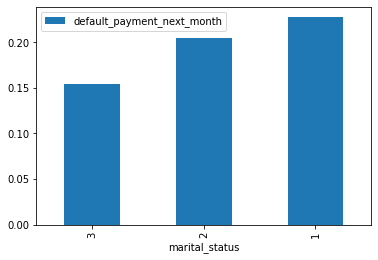

In [111]:
df_clean.groupby('marital_status')[['default_payment_next_month']].mean().sort_values('default_payment_next_month').plot(kind='bar')

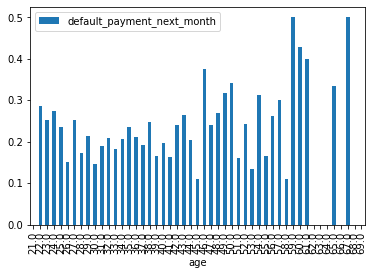

In [110]:
df_clean.groupby('age')[['default_payment_next_month']].mean().sort_values('age').plot(kind='bar')

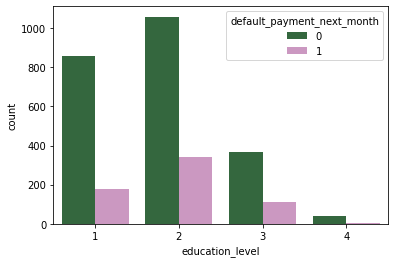

In [106]:
sns.countplot(data=df_clean,x='education_level',hue='default_payment_next_month',palette="cubehelix")

Hasil EDA for Analysis menunjukan :
- status pernikahan dengan kategori menikah memiliki nilai tinggi untuk pembayaran teratur pada bulan selanjutnya
- rentang umur nasabah pada bank tersebut mempunyai rentang dari umur 21 - 69 tahun
- pada education level menunjukan kategori university merupakan kategori tertinggi untuk yang tidak membayar secara teratur pada bulan selanjutnya

#### Split data into Train, Test and Inference

In [35]:
inference = df_clean.sample(5, random_state=17)
inference

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,180000.0,1,1,1,35.0,0.0,0.0,0.0,0.0,0,...,132806.0,135603.0,137803.0,7187.0,5000.0,4749.0,5141.0,4916.0,4000.0,0
325,20000.0,1,3,2,38.0,0.0,0.0,0.0,0.0,0,...,18335.0,18718.0,18475.0,1318.0,1289.0,647.0,669.0,664.0,682.0,0
47,240000.0,1,1,1,35.0,0.0,0.0,0.0,0.0,0,...,155064.0,148969.0,148619.0,8000.0,6017.0,6900.0,5250.0,5400.0,6200.0,0
2848,240000.0,2,2,2,30.0,0.0,0.0,0.0,0.0,0,...,416.0,416.0,416.0,18432.0,1416.0,16580.0,416.0,416.0,416.0,1
446,150000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,10927.0,11598.0,13235.0,2000.0,3000.0,1000.0,1000.0,2000.0,2000.0,0


In [36]:
df_clean = df_clean.drop(inference.index)

In [37]:
df_clean.shape

(2959, 24)

In [38]:
df_clean.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1


In [39]:
X = df_clean.drop('default_payment_next_month', axis=1)
y = df_clean['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2219, 23)
(740, 23)
(2219,)
(740,)


In [40]:
df_eda = pd.concat([X_train, y_train], axis=1)
testing = pd.concat([X_test, y_test], axis=1)

df_eda.shape

(2219, 24)

Selanjutnya data dibagi kedalam 3 dataframe:
1. data inference yang selanjutnya akan digunakan untuk menguji model dapat berjalan dengan semestinya
2. data train yang digunakan untuk melatih model
3. data testing yang digunakan untuk menguji model

### EDA FOR MODELING

In [41]:
df_eda.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
291,280000.0,1,1,2,33.0,0.0,0.0,0.0,0.0,0,...,189287.0,185398.0,184414.0,10000.0,10059.0,5201.0,5211.0,5500.0,5500.0,0
1948,20000.0,2,2,2,21.0,0.0,0.0,2.0,2.0,0,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,0


#### Numerical feature

In [42]:
df_num = df_clean[['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6' , 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
df_num.head(3)

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,130000.0,45.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
1,230000.0,41.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0
2,50000.0,42.0,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0


In [43]:
skew = df_num.skew()
skewness = pd.DataFrame(skew)
skewness

,0
limit_balance,1.001283
age,0.772606
bill_amt_1,2.489448
bill_amt_2,2.463145
bill_amt_3,2.573814
bill_amt_4,2.452296
bill_amt_5,2.404885
bill_amt_6,2.437294
pay_amt_1,11.868752
pay_amt_2,29.375586


In [44]:
skewness.columns =['value']

In [45]:
skewness['distribusi']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribusi"][i]='distribusi normal'
  else:
    skewness["distribusi"][i]='distribusi tidak normal'
skewness

,value,distribusi
limit_balance,1.001283,distribusi tidak normal
age,0.772606,distribusi tidak normal
bill_amt_1,2.489448,distribusi tidak normal
bill_amt_2,2.463145,distribusi tidak normal
bill_amt_3,2.573814,distribusi tidak normal
bill_amt_4,2.452296,distribusi tidak normal
bill_amt_5,2.404885,distribusi tidak normal
bill_amt_6,2.437294,distribusi tidak normal
pay_amt_1,11.868752,distribusi tidak normal
pay_amt_2,29.375586,distribusi tidak normal


In [46]:
numerical = df_num

In [47]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()

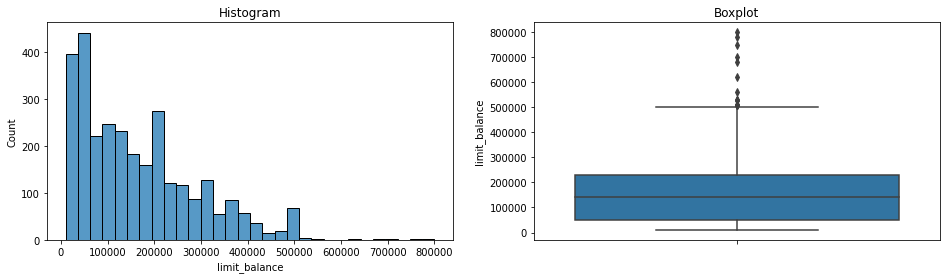

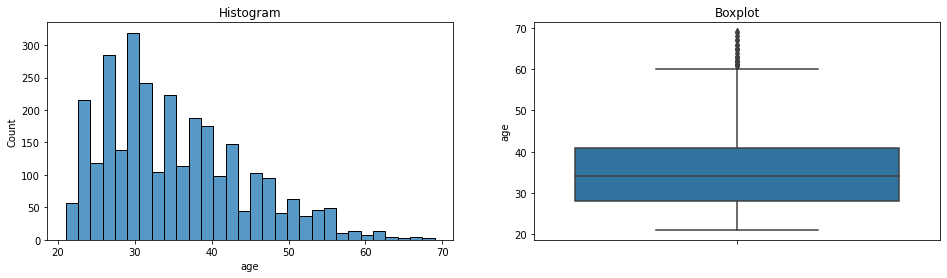

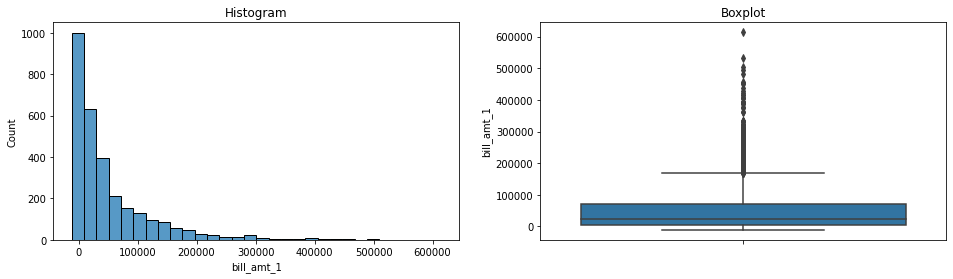

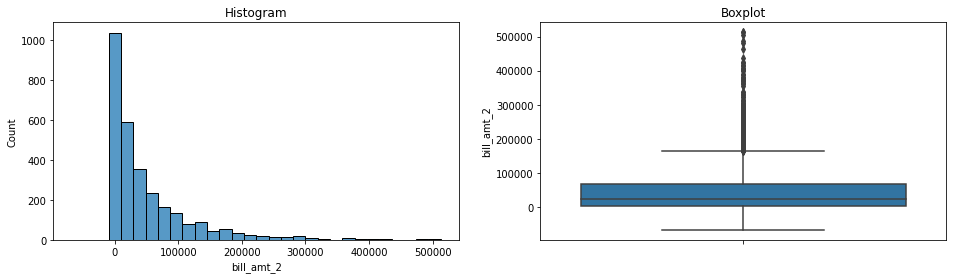

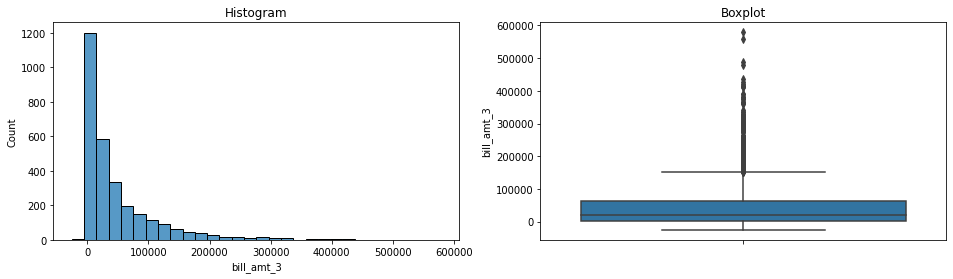

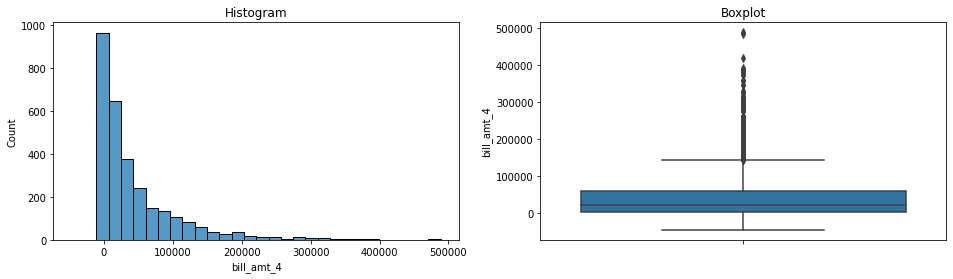

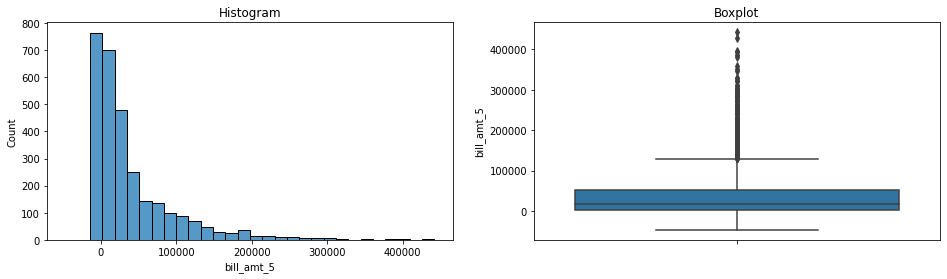

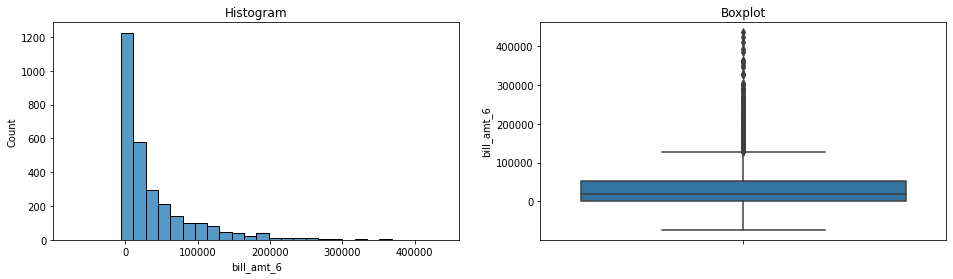

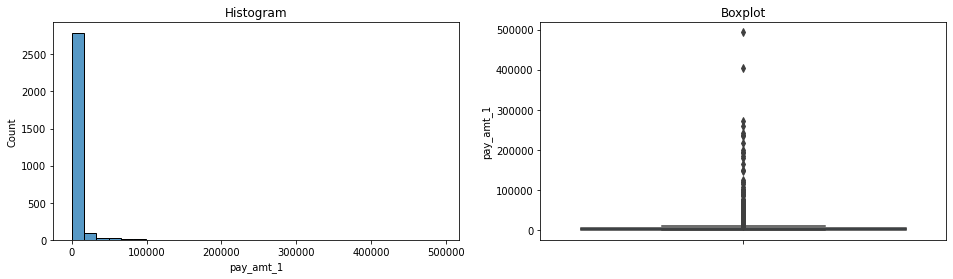

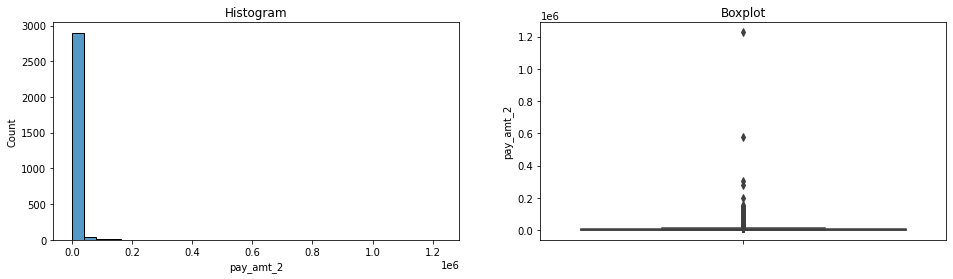

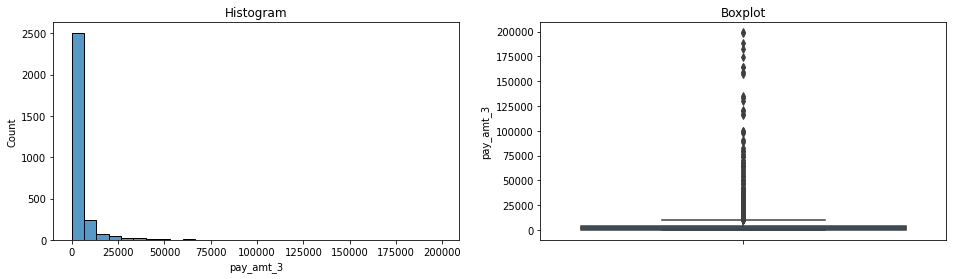

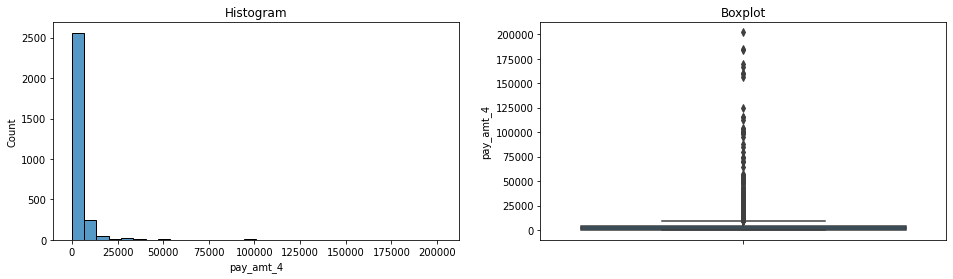

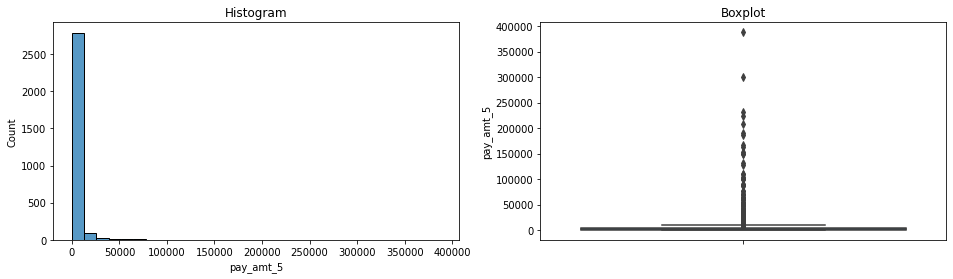

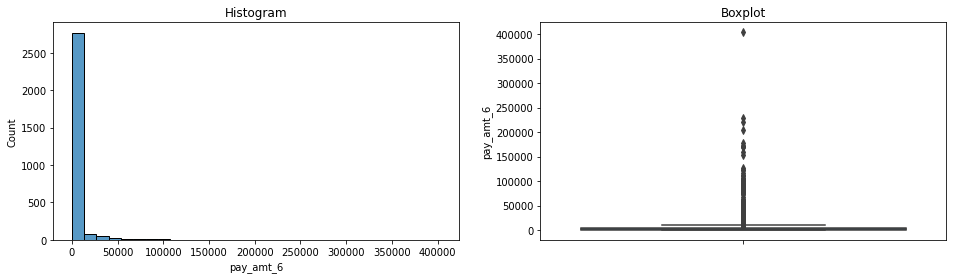

In [48]:
diagnostic_plots(numerical, 'limit_balance')
diagnostic_plots(numerical, 'age')
diagnostic_plots(numerical, 'bill_amt_1')
diagnostic_plots(numerical, 'bill_amt_2')
diagnostic_plots(numerical, 'bill_amt_3')
diagnostic_plots(numerical, 'bill_amt_4')
diagnostic_plots(numerical, 'bill_amt_5')
diagnostic_plots(numerical, 'bill_amt_6')
diagnostic_plots(numerical, 'pay_amt_1')
diagnostic_plots(numerical, 'pay_amt_2')
diagnostic_plots(numerical, 'pay_amt_3')
diagnostic_plots(numerical, 'pay_amt_4')
diagnostic_plots(numerical, 'pay_amt_5')
diagnostic_plots(numerical, 'pay_amt_6')

In [49]:
Q3 = df_eda['limit_balance'].quantile(.75)
Q1 = df_eda['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['limit_balance'] > upper) | (df_eda['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent limit_balance of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

count of outlier:  8
percent limit_balance of outlier:  0.3605227579990987 %


In [50]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, 
variables=['limit_balance'])

df_model = wins.fit_transform(df_eda)

In [51]:
print('before handling: \n', df_eda.limit_balance.describe())

before handling: 
 count      2219.000000
mean     163132.041460
std      126038.217385
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: limit_balance, dtype: float64


In [52]:
print('after handling: \n', df_model.limit_balance.describe())

after handling: 
 count      2219.000000
mean     162622.803064
std      124117.689151
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      525000.000000
Name: limit_balance, dtype: float64


#### Categorical Feature

In [53]:
df_model

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
291,280000.0,1,1,2,33.0,0.0,0.0,0.0,0.0,0,...,189287.0,185398.0,184414.0,10000.0,10059.0,5201.0,5211.0,5500.0,5500.0,0
1948,20000.0,2,2,2,21.0,0.0,0.0,2.0,2.0,0,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,0
2482,230000.0,1,1,1,38.0,0.0,0.0,0.0,0.0,0,...,1346.0,1024.0,-4.0,2170.0,1149.0,1352.0,1029.0,0.0,654.0,0
1269,190000.0,2,2,3,29.0,1.0,0.0,0.0,0.0,0,...,306.0,306.0,0.0,0.0,306.0,0.0,0.0,0.0,0.0,0
2918,260000.0,2,1,2,33.0,0.0,0.0,0.0,0.0,0,...,2190.0,810.0,0.0,204.0,0.0,3000.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,90000.0,2,1,2,31.0,0.0,0.0,2.0,2.0,2,...,85939.0,83680.0,89319.0,8000.0,4100.0,3000.0,0.0,7000.0,3100.0,1
1688,20000.0,1,2,1,26.0,1.0,2.0,2.0,2.0,2,...,11884.0,12894.0,12540.0,0.0,2000.0,0.0,1203.0,0.0,1700.0,0
742,50000.0,2,3,1,57.0,0.0,0.0,0.0,0.0,0,...,50706.0,30636.0,30501.0,2100.0,2500.0,3820.0,1636.0,1501.0,1700.0,1
290,150000.0,1,2,2,37.0,0.0,0.0,0.0,0.0,0,...,103711.0,104153.0,103240.0,4000.0,3700.0,3700.0,3756.0,3800.0,3500.0,0


In [54]:
df_cat = df_model[['sex', 'education_level', 'marital_status', 
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',  'default_payment_next_month']]
df_cat.head(3)

,sex,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
291,1,1,2,0.0,0.0,0.0,0.0,0,0,0
1948,2,2,2,0.0,0.0,2.0,2.0,0,0,0
2482,1,1,1,0.0,0.0,0.0,0.0,0,0,0


Membagi kolom mengikuti tipe datanya:
1. Numerikal data
- dilakukan perhitungan nilai skew pada masing-masing kolom
- sebaran data : dari nilai skew dan distribusi yang ditampilkan berdasarkan grafik histogram dan boxplot menunjukan bahwa data mempunyai persebaran yang tidak normal (asimetris). Seluruh kolom menunjukan positif skew yang mana dalam histogram ditunjukan sebagai right skew (lembah kanan pada grafik lebih panjang)
- dilakukan capping pada kolom 'limit_balance' menggunakan winsorizer dengan perhitungan iqr, hal tersebut dikarenakan persebaran data yang tidak normal
- perbedaan yang ditunjukan sebelum dan sesudah dilakukan capping: terjadinya penurunan pada nilai mean, standardeviasi dan max
2. Kategorikal data
- tidak dilakukan perlakuan lagi pada proses ini dikarenakan sudah dilakukan pada proses data cleaning. Langkah tersebut dilakukan dengan tujuan penyeragaman data sebelum masuk kedalam model

#### Combine Numerical and Categorical

In [55]:
df_model.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
291,280000.0,1,1,2,33.0,0.0,0.0,0.0,0.0,0,...,189287.0,185398.0,184414.0,10000.0,10059.0,5201.0,5211.0,5500.0,5500.0,0
1948,20000.0,2,2,2,21.0,0.0,0.0,2.0,2.0,0,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,0
2482,230000.0,1,1,1,38.0,0.0,0.0,0.0,0.0,0,...,1346.0,1024.0,-4.0,2170.0,1149.0,1352.0,1029.0,0.0,654.0,0


In [56]:
df_model.shape

(2219, 24)

Penggabungan data numerikal dan kategorikal:
- handling outlier diterapkan pada data train yang mengandung seluruh informasi, bukan pada data yang mengandung informasi numerikal saja dan tidak terdapatnya perlakuan pada data kategorikal. Sehingga pada proses ini hanya memanggil ullang data train

#### Feature Selection

In [57]:
df_model.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
291,280000.0,1,1,2,33.0,0.0,0.0,0.0,0.0,0,...,189287.0,185398.0,184414.0,10000.0,10059.0,5201.0,5211.0,5500.0,5500.0,0
1948,20000.0,2,2,2,21.0,0.0,0.0,2.0,2.0,0,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,0
2482,230000.0,1,1,1,38.0,0.0,0.0,0.0,0.0,0,...,1346.0,1024.0,-4.0,2170.0,1149.0,1352.0,1029.0,0.0,654.0,0


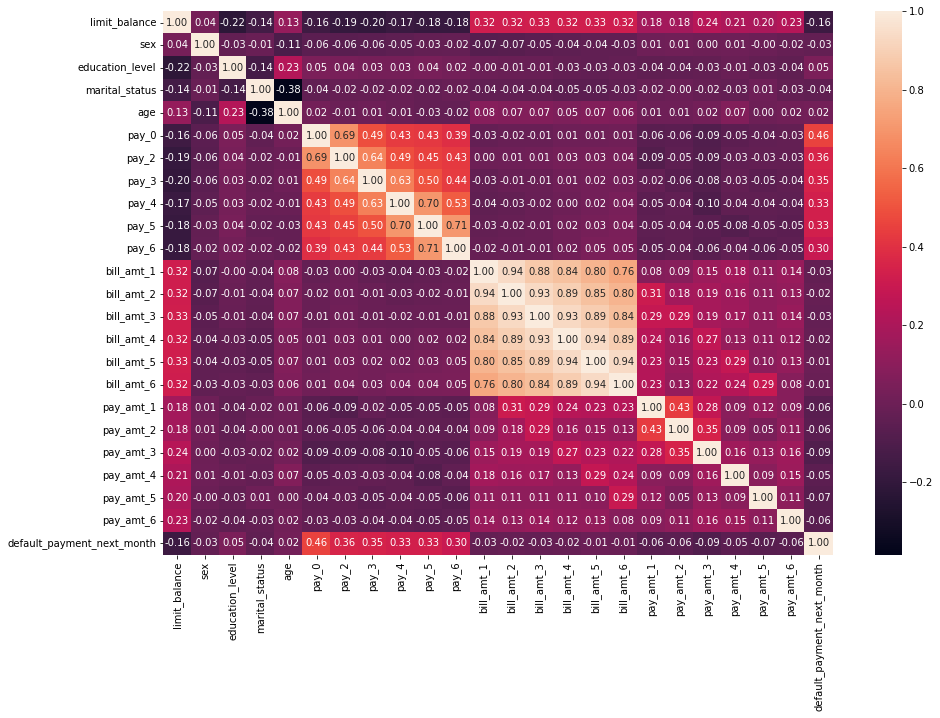

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df_model.corr(), annot=True, fmt='.2f')
plt.show()

In [59]:
X_select = df_model.drop('default_payment_next_month',axis=1).copy()
y_select = df_model['default_payment_next_month']

Feature: 0, Score: 0.07160
Feature: 1, Score: 0.02138
Feature: 2, Score: 0.01936
Feature: 3, Score: 0.01897
Feature: 4, Score: 0.05073
Feature: 5, Score: 0.20729
Feature: 6, Score: 0.00857
Feature: 7, Score: 0.02743
Feature: 8, Score: 0.00402
Feature: 9, Score: 0.02123
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.06236
Feature: 12, Score: 0.04236
Feature: 13, Score: 0.03172
Feature: 14, Score: 0.03400
Feature: 15, Score: 0.02629
Feature: 16, Score: 0.05046
Feature: 17, Score: 0.03946
Feature: 18, Score: 0.06039
Feature: 19, Score: 0.04035
Feature: 20, Score: 0.03980
Feature: 21, Score: 0.04781
Feature: 22, Score: 0.07443


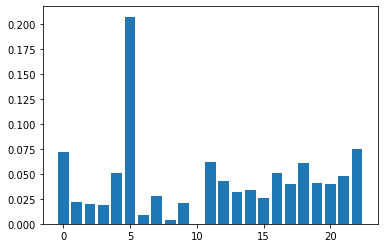

In [60]:
X, y = X_select, y_select
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
df_model.shape

(2219, 24)

In [62]:
num_col_scalling = ['age', 'limit_balance']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_model[num_col_scalling]))
num_scaled.columns = num_col_scalling

df_model.drop(num_col_scalling, axis=1, inplace=True)
df_train = pd.concat([df_model.reset_index(drop=True), num_scaled], axis=1)

df_train = df_train[['age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']]

In [63]:
num_scaled.shape

(2219, 2)

In [64]:
df_train.head()

,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.250000,0.0,0.0,0.0,0.0,0,0,0
1,0.000000,0.0,0.0,2.0,2.0,0,0,0
2,0.354167,0.0,0.0,0.0,0.0,0,0,0
3,0.166667,1.0,0.0,0.0,0.0,0,0,0
4,0.250000,0.0,0.0,0.0,0.0,0,0,0


Feature Selecting :
- melakukan dua pertimbangan yaitu dengan menggunakan corr heatmap dan feature importance dari desicion tree
- corr heatmap menunjukan bahwa pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 mempunyai korelasi positif terhadap target
- feature importance menunjukan kolom age mempunyai peranan penting terhadap target
- dari kedua pertimbangan tersebut didapatkan beberapa kolom yang akan digunakan sebagai feature. adapun kolom tersebut adalah : age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6
- sebelum masuk model, feature age dilakukan perlakuan scalling terlebih dahulu. Scaling yang digunakan adalah MinMaxScaler, dikarenakan data berdistribusi tidak normal

### PREPROCESS

In [65]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2316,330000.0,2,2,1,43.0,1.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,22359.0,5895.0,0.0,0.0,0.0,0.0,0
673,400000.0,2,2,1,24.0,0.0,0.0,0.0,0.0,0,...,89128.0,39276.0,23440.0,5519.0,44776.0,1502.0,2026.0,1015.0,52100.0,0


In [66]:
testing = wins.transform(testing)
testing.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2316,330000.0,2,2,1,43.0,1.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,22359.0,5895.0,0.0,0.0,0.0,0.0,0
673,400000.0,2,2,1,24.0,0.0,0.0,0.0,0.0,0,...,89128.0,39276.0,23440.0,5519.0,44776.0,1502.0,2026.0,1015.0,52100.0,0


In [67]:
testing.shape

(740, 24)

In [68]:
num_scaled_testing = pd.DataFrame(scaler.transform(testing[num_col_scalling]))
num_scaled_testing.columns = num_col_scalling

testing.drop(num_col_scalling, axis=1, inplace=True)
testing_model = pd.concat([testing.reset_index(drop=True), num_scaled_testing], axis=1)

testing_model = testing_model[['age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']]
testing_model.head(2)

,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.458333,1.0,0.0,0.0,0.0,0,0,0
1,0.062500,0.0,0.0,0.0,0.0,0,0,0


Preprocess:
- melakukan transform winsorizer kepada data testing untuk menyamkan perlakuan pada handling outlier
- melakukan transform scaling pada data testing dengan orde yang sama dengan data train 

Persiapan data sebelum masuk model
- data yang digunakan sudah melalui scaling
- base tree model tidak memerlukan proses scaling, namun pada pemodelan ini data sudah melalui proses scaling yang mana mengikuti model lain yang sensitif terhadap ordo pada data

In [69]:
X_train = df_train.drop('default_payment_next_month',axis=1).copy()
y_train = df_train['default_payment_next_month']

X_test = testing_model.drop('default_payment_next_month',axis=1).copy()
y_test = testing_model['default_payment_next_month']

### MODEL BUILDING

Adapun model yang digunakan adalah sebagai berikut:
1. Logistic regression
2. SVC
3. Desicion Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. Bagging Classifier
8. Adaboost Classifier

Statement : 
- `default_payment_next_month`  : Default payment (1=yes, 0=no)
- Mencari model terbaik dalam memprediksi kategori 1 yang mana kategori tersebut yang dijadikan urgensi dalam pemodelan ini

In [70]:
logreg = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=0))
adb = AdaBoostClassifier()

### MODEL EVALUATION

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1744
           1       0.74      0.39      0.51       475

    accuracy                           0.84      2219
   macro avg       0.79      0.68      0.71      2219
weighted avg       0.83      0.84      0.82      2219

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       581
           1       0.67      0.36      0.47       159

    accuracy                           0.83       740
   macro avg       0.76      0.66      0.68       740
weighted avg       0.81      0.83      0.80       740

Confusion Matrix      : 


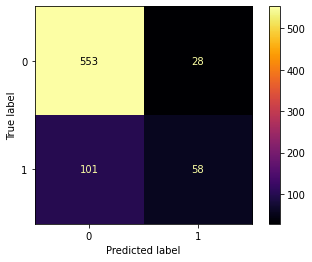

In [71]:
logreg.fit(X_train, y_train)

lr_train = logreg.predict(X_train)
lr_test = logreg.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='inferno'))

Logistic Regression:
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model just fit, yang mana dapat dilihat recall untuk data train sebesar 0,39 dan data test sebesar 0,36
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 58 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### SVM

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1744
           1       0.72      0.45      0.56       475

    accuracy                           0.84      2219
   macro avg       0.79      0.70      0.73      2219
weighted avg       0.83      0.84      0.83      2219

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       581
           1       0.69      0.43      0.53       159

    accuracy                           0.84       740
   macro avg       0.77      0.69      0.71       740
weighted avg       0.82      0.84      0.82       740

Confusion Matrix      : 


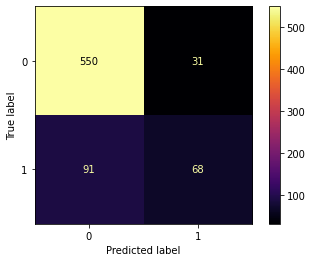

In [72]:
svc.fit(X_train, y_train)

svc_train = svc.predict(X_train)
svc_test = svc.predict(X_test)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, cmap='inferno'))

SVM :
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model just fit, yang mana dapat dilihat recall untuk data train sebesar 0,45 dan data test sebesar 0,43
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 68 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1744
           1       0.96      0.54      0.69       475

    accuracy                           0.90      2219
   macro avg       0.92      0.77      0.81      2219
weighted avg       0.90      0.90      0.88      2219

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       581
           1       0.60      0.35      0.44       159

    accuracy                           0.81       740
   macro avg       0.72      0.64      0.66       740
weighted avg       0.79      0.81      0.79       740

Confusion Matrix      : 


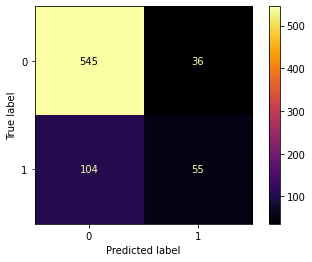

In [73]:
dtc.fit(X_train, y_train)

dtc_train = dtc.predict(X_train)
dtc_test = dtc.predict(X_test)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, cmap='inferno'))

Desician Tree :
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model overfit, yang mana dapat dilihat recall untuk data train sebesar 0,54 dan data test sebesar 0,35
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 55 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### Random Forest

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1744
           1       0.93      0.56      0.70       475

    accuracy                           0.90      2219
   macro avg       0.91      0.77      0.82      2219
weighted avg       0.90      0.90      0.89      2219

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       581
           1       0.63      0.43      0.51       159

    accuracy                           0.82       740
   macro avg       0.74      0.68      0.70       740
weighted avg       0.81      0.82      0.81       740

Confusion Matrix      : 


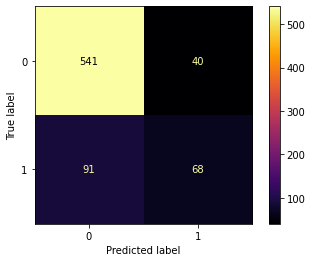

In [74]:
rfc.fit(X_train, y_train)

rfc_train = rfc.predict(X_train)
rfc_test = rfc.predict(X_test)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='inferno'))

Random Forest :
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model overfit, yang mana dapat dilihat recall untuk data train sebesar 0,56 dan data test sebesar 0,43
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 68 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### KNN

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1744
           1       0.75      0.47      0.58       475

    accuracy                           0.85      2219
   macro avg       0.81      0.71      0.74      2219
weighted avg       0.84      0.85      0.84      2219

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       581
           1       0.60      0.37      0.46       159

    accuracy                           0.81       740
   macro avg       0.72      0.65      0.67       740
weighted avg       0.79      0.81      0.79       740

Confusion Matrix      : 


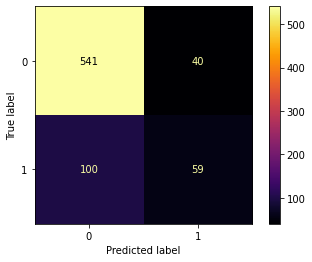

In [75]:
knn.fit(X_train, y_train)

knn_train = knn.predict(X_train)
knn_test = knn.predict(X_test)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='inferno'))

KNN :
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model overfit, yang mana dapat dilihat recall untuk data train sebesar 0,47 dan data test sebesar 0,37
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 59 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1744
           1       0.55      0.53      0.54       475

    accuracy                           0.81      2219
   macro avg       0.71      0.71      0.71      2219
weighted avg       0.81      0.81      0.81      2219

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       581
           1       0.58      0.57      0.58       159

    accuracy                           0.82       740
   macro avg       0.73      0.73      0.73       740
weighted avg       0.82      0.82      0.82       740

Confusion Matrix      : 


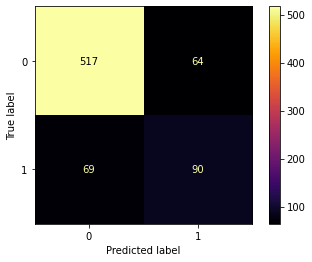

In [76]:
gnb.fit(X_train, y_train)

gnb_train = gnb.predict(X_train)
gnb_test = gnb.predict(X_test)

print(classification_report(y_train, gnb_train))
print(classification_report(y_test, gnb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap='inferno'))

Naive Bayes :
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model just fit, yang mana dapat dilihat recall untuk data train sebesar 0,53 dan data test sebesar 0,57
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 90 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### Bagging Classifier

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1744
           1       0.89      0.56      0.68       475

    accuracy                           0.89      2219
   macro avg       0.89      0.77      0.81      2219
weighted avg       0.89      0.89      0.88      2219

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       581
           1       0.58      0.39      0.47       159

    accuracy                           0.81       740
   macro avg       0.72      0.66      0.68       740
weighted avg       0.79      0.81      0.79       740

Confusion Matrix      : 


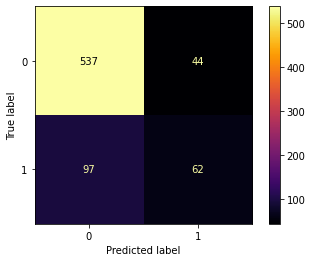

In [77]:
bag_clf.fit(X_train, y_train)

bag_clf_train = bag_clf.predict(X_train)
bag_clf_test = bag_clf.predict(X_test)

print(classification_report(y_train, bag_clf_train))
print(classification_report(y_test, bag_clf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(bag_clf, X_test, y_test, cmap='inferno'))

Bagging Classifier :
- Bagging Classifier merupakan esemble model dari Desicion Tree
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model overfit, yang mana dapat dilihat recall untuk data train sebesar 0,56 dan data test sebesar 0,34
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 54 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### Adaboost Classifier

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1744
           1       0.73      0.44      0.54       475

    accuracy                           0.84      2219
   macro avg       0.79      0.70      0.73      2219
weighted avg       0.83      0.84      0.83      2219

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       581
           1       0.69      0.40      0.51       159

    accuracy                           0.83       740
   macro avg       0.77      0.68      0.70       740
weighted avg       0.82      0.83      0.81       740

Confusion Matrix      : 


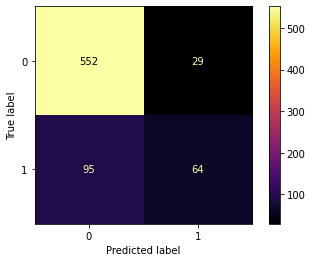

In [78]:
adb.fit(X_train, y_train)

adb_train = adb.predict(X_train)
adb_test = adb.predict(X_test)

print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, X_test, y_test, cmap='inferno'))

Adaboost Classifier :
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model justfit, yang mana dapat dilihat recall untuk data train sebesar 0,44 dan data test sebesar 0,40
- Dapat dilihat pula pada confusion matriks yang menunjukan model hanya dapat memprediksi 64 data dengan benar dari 159 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

### CROSS VALIDATION

#### Logistic Regression

In [79]:
# Cross Validation using `cross_val_score`

cv_logrec = cross_val_score(logreg,X_train, y_train, cv=5, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_logrec)
print('accuracy Score - Mean - Cross Validation : ', cv_logrec.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_logrec.std())
print('accuracy Score - Range of Test-Set       : ', (cv_logrec.mean()-cv_logrec.std()) , '-', (cv_logrec.mean()+cv_logrec.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.83108108 0.83333333 0.84009009 0.84459459 0.82844244]
accuracy Score - Mean - Cross Validation :  0.83550830740447
accuracy Score - Std - Cross Validation  :  0.005963400106213297
accuracy Score - Range of Test-Set       :  0.8295449072982567 - 0.8414717075106833


#### SVM

In [80]:
cv_svc = cross_val_score(svc,X_train, y_train, cv=5, scoring='accuracy')

print('SVM')
print('accuracy Score - All - Cross Validation  : ', cv_svc)
print('accuracy Score - Mean - Cross Validation : ', cv_svc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_svc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_svc.mean()-cv_svc.std()) , '-', (cv_svc.mean()+cv_svc.std()))

SVM
accuracy Score - All - Cross Validation  :  [0.83333333 0.82657658 0.84009009 0.83108108 0.80812641]
accuracy Score - Mean - Cross Validation :  0.827841498383259
accuracy Score - Std - Cross Validation  :  0.0107793121318535
accuracy Score - Range of Test-Set       :  0.8170621862514056 - 0.8386208105151125


#### Decision Tree

In [81]:
cv_dtc = cross_val_score(dtc,X_train, y_train, cv=5, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_dtc)
print('accuracy Score - Mean - Cross Validation : ', cv_dtc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_dtc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_dtc.mean()-cv_dtc.std()) , '-', (cv_dtc.mean()+cv_dtc.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.83783784 0.79054054 0.81306306 0.81081081 0.78103837]
accuracy Score - Mean - Cross Validation :  0.8066581253940172
accuracy Score - Std - Cross Validation  :  0.019731146226275944
accuracy Score - Range of Test-Set       :  0.7869269791677412 - 0.8263892716202931


#### Random Forest

In [82]:
cv_rfc = cross_val_score(rfc,X_train, y_train, cv=5, scoring='accuracy')

print('RandomForest')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

RandomForest
accuracy Score - All - Cross Validation  :  [0.84459459 0.79504505 0.81756757 0.78828829 0.79232506]
accuracy Score - Mean - Cross Validation :  0.8075641103857809
accuracy Score - Std - Cross Validation  :  0.02112741818694444
accuracy Score - Range of Test-Set       :  0.7864366921988365 - 0.8286915285727253


#### KNN

In [83]:
cv_knn = cross_val_score(knn,X_train, y_train, cv=5, scoring='accuracy')

print('KNN')
print('accuracy Score - All - Cross Validation  : ', cv_knn)
print('accuracy Score - Mean - Cross Validation : ', cv_knn.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_knn.std())
print('accuracy Score - Range of Test-Set       : ', (cv_knn.mean()-cv_knn.std()) , '-', (cv_knn.mean()+cv_knn.std()))

KNN
accuracy Score - All - Cross Validation  :  [0.82657658 0.8018018  0.82657658 0.79279279 0.80586907]
accuracy Score - Mean - Cross Validation :  0.8107233644479693
accuracy Score - Std - Cross Validation  :  0.01361846159076576
accuracy Score - Range of Test-Set       :  0.7971049028572036 - 0.8243418260387351


#### Naive Bayes

In [84]:
cv_gnb = cross_val_score(gnb,X_train, y_train, cv=5, scoring='accuracy')

print('NaiveBayes')
print('accuracy Score - All - Cross Validation  : ', cv_gnb)
print('accuracy Score - Mean - Cross Validation : ', cv_gnb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_gnb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_gnb.mean()-cv_gnb.std()) , '-', (cv_gnb.mean()+cv_gnb.std()))

NaiveBayes
accuracy Score - All - Cross Validation  :  [0.81531532 0.78603604 0.79954955 0.80405405 0.80586907]
accuracy Score - Mean - Cross Validation :  0.8021648058894109
accuracy Score - Std - Cross Validation  :  0.00956246354634193
accuracy Score - Range of Test-Set       :  0.7926023423430689 - 0.8117272694357528


#### Bagging Classifier

In [85]:
cv_bag_clf = cross_val_score(bag_clf,X_train, y_train, cv=5, scoring='accuracy')

print('BaggingClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_bag_clf)
print('accuracy Score - Mean - Cross Validation : ', cv_bag_clf.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_bag_clf.std())
print('accuracy Score - Range of Test-Set       : ', (cv_bag_clf.mean()-cv_bag_clf.std()) , '-', (cv_bag_clf.mean()+cv_bag_clf.std()))

BaggingClassifier
accuracy Score - All - Cross Validation  :  [0.85135135 0.80630631 0.81531532 0.7972973  0.79232506]
accuracy Score - Mean - Cross Validation :  0.8125190653407358
accuracy Score - Std - Cross Validation  :  0.020946904514356893
accuracy Score - Range of Test-Set       :  0.7915721608263789 - 0.8334659698550927


#### Adaboost Classifier

In [86]:
cv_adb = cross_val_score(adb,X_train, y_train, cv=5, scoring='accuracy')

print('AdaBoostClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

AdaBoostClassifier
accuracy Score - All - Cross Validation  :  [0.83333333 0.82882883 0.8490991  0.8490991  0.83069977]
accuracy Score - Mean - Cross Validation :  0.8382120269253452
accuracy Score - Std - Cross Validation  :  0.009003740097632804
accuracy Score - Range of Test-Set       :  0.8292082868277124 - 0.8472157670229781


#### Hasil CV

In [87]:
crossval = [cv_logrec,cv_svc,cv_dtc,cv_rfc,cv_knn,cv_gnb, cv_bag_clf, cv_adb]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Bagging Classifier','AdaBoost']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,2)
bestmodel['Std']=np.round(std,2)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Logistic Regression,0.84,0.01
1,AdaBoost,0.84,0.01
2,SVM,0.83,0.01
3,Decision Tree,0.81,0.02
4,Random Forest,0.81,0.02
5,KNN,0.81,0.01
6,Bagging Classifier,0.81,0.02
7,Naive Bayes,0.80,0.01


Cross Valuation dilakukan pada semua model dengan tujuan untuk melihat konsistensi model dalam mengolah dan memprediksi data. Hasil digunakan untuk menentukan model terbaik yang selanjutnya dilakukan perlakuan hyperparameter tuning. Pemilihan model dilihat dari nilai mean terbesar dan nilai standardeviasi terkecil. Hasil adalah sebagai berikut:
- Standar deviasi tiap-tiap model menunjukan nilai yang rendah, yang mana selanjutnya dapat dilihat nilai mean pada tiap-tiap model
- nilai mean tertinggi ada pada model logistic regression dan terendah pada model naive bayes
- model yang dipilih untuk selanjutnya dilakukan hyperparameter tuning adalah model logistic regression dan adaboost. Kedua model ini dipilih karena mempunyai nilai yang sama untuk mean dan standardeviasinya

### HYPER-PARAMETER TUNNING

#### Logistic Regression

In [88]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [89]:
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='recall')

In [90]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
best score: 0.3915558740015392


In [91]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1744
           1       0.73      0.40      0.51       475

    accuracy                           0.84      2219
   macro avg       0.79      0.68      0.71      2219
weighted avg       0.83      0.84      0.82      2219

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       581
           1       0.67      0.36      0.47       159

    accuracy                           0.83       740
   macro avg       0.76      0.66      0.68       740
weighted avg       0.81      0.83      0.80       740



Confusion Matrix      : 


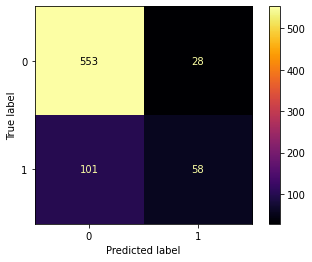

In [92]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='inferno'))

In [93]:
print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1744
           1       0.74      0.39      0.51       475

    accuracy                           0.84      2219
   macro avg       0.79      0.68      0.71      2219
weighted avg       0.83      0.84      0.82      2219

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       581
           1       0.67      0.36      0.47       159

    accuracy                           0.83       740
   macro avg       0.76      0.66      0.68       740
weighted avg       0.81      0.83      0.80       740



#### Adaboost

In [94]:
param_grid1 = [    
    {'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm' : ['SAMME', 'SAMME.R']
    }
]

In [95]:
grid_search1 = GridSearchCV(adb, param_grid=param_grid1, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                          'n_estimators': [10, 50, 100, 500]}],
             return_train_score=True, scoring='recall')

In [96]:
print('best params:', grid_search1.best_params_)
print('best score:', grid_search1.best_score_)

best params: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
best score: 0.40834063105379087


In [97]:
model1 = grid_search1.best_estimator_

model1.fit(X_train, y_train)

model_train1 = model1.predict(X_train)
model_test1 = model1.predict(X_test)

print(classification_report(y_train, model_train1))
print(classification_report(y_test, model_test1))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1744
           1       0.72      0.41      0.52       475

    accuracy                           0.84      2219
   macro avg       0.79      0.68      0.71      2219
weighted avg       0.83      0.84      0.82      2219

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       581
           1       0.71      0.40      0.51       159

    accuracy                           0.84       740
   macro avg       0.78      0.68      0.70       740
weighted avg       0.82      0.84      0.82       740



Confusion Matrix      : 


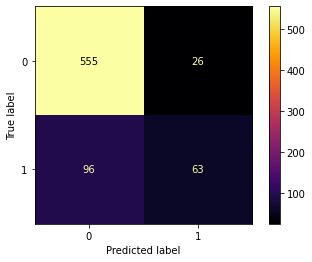

In [98]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test, cmap='inferno'))

In [99]:
print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1744
           1       0.73      0.44      0.54       475

    accuracy                           0.84      2219
   macro avg       0.79      0.70      0.73      2219
weighted avg       0.83      0.84      0.83      2219

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       581
           1       0.69      0.40      0.51       159

    accuracy                           0.83       740
   macro avg       0.77      0.68      0.70       740
weighted avg       0.82      0.83      0.81       740



Hasil hyperparameter tuning:
-  tidak adanya perubahan pada nilai recall pada pengaturan yang sudah diterapkan pada model logistic regression
-  terjadinya sedikit penurunan pada nilai recall setelah dilakukannya pengaturan hyperparameter untuk model adaboost

conclussion:
- hal tersebut dikarenakan data yang imbalance dan sehingga model tidak mempunyai data yang cukup untuk memetakan target dengan kategori 1
- untuk memperbaiki model, dapat dilakukan feature engenering advance dengan tujuan mengatasi imbalance pada data 

### MODEL INFERENCE

In [100]:
X_inf = inference[['age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']]

In [101]:
model.predict(X_inf)

array([1, 1, 1, 1, 1])

In [102]:
model1.predict(X_inf)

array([0, 0, 0, 0, 0])

In [103]:
inference.default_payment_next_month

91      0
325     0
47      0
2848    1
446     0
Name: default_payment_next_month, dtype: int64

Berdasarkan model inference, model adaboost dengan parameter yang sudah di tuning memprediksi lebih baik daripada model Logistic regresi

### CONCLUSION

- Feature engenering dilakukan pada proses data cleaning, hal tersebut dikarenakan untuk menyelaraskan data dengan tujuan memudahkan pada saat preprocessing
- Tidak dilakukannya handling outlier pada data age, hal tersebut karena tidak memungkinkan untuk mengubah nilai tersebut
- feature selection dilakukan dengan mempertimbangkan 2 algoritma, yang pertama dengan menggunakan corr heatmap dan yang kedua dengan menggunakan feature importance dari decision tree
- Cross valuation yang dilakukan kepada semua model menunjukan model logistic regression dan adaboost dengan hasil yang baik
- hyperparameter tuning tidak membantu model untuk menghasilkan performa yang lebih baik
- Data yang digunakan pada model ini tidak balance, yang mana berdampak pada performa model

### CONCEPTUAL PROBLEMS

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

1. 
- criterion pada decision tree berfungsi sebagai metode dalam pemisahan data dengan tujuan membentuk klasifikasi
- gini, merupakan nilai dari keseragaman data dalam suatu leaf, semakin kecil semakin seragam data pada leaf tersebut. nilai 0 menunjukan data pada leaf sudah seragam

2. pruning digunakan untuk mengurangi overfit yang sering terjadi pada tree model, terbaggi menjadi dua yaitu pre pruning dan post pruning


3. Tidak ada metode statistik untuk memilih K yang optimal dalam KNN. nilai K ditentukan berdasarkan asumsi sendiri,  mengekplorasi model dengan menggunakan beberapa nilai K yang selanjutnya dibandingkan dengan matrix evaluationnya

4. cross validation berguna untuk melihat konsistensi model. merupakan pengulangan model dengan data yang sama secara random, mengikuti kepada nilai yang ditentukan oleh pembuat model. nilai yang dihasilkan merupakan rerata dari keseluruhan nilai akurasi model 

5. 
- F1 score merupakan gambaran dari gabungan antara precision dan recall
- precision dan recall menjadi acuan ketika model mempunyai data yang tidak balance. pengamatan pada kedua nilai ini mengikutii pertimbangan urgensi pada tiap-tiap model yang dibangun
- akurasi adalah nilai keakuratan sebuah model dalam memprediksi suatu data, nilai ini dapat digunakan ketika data balance